In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "data/raw/processed_images"

# Dimensions standardisées
img_height, img_width = 128, 128
batch_size = 32

# Générateurs d'images avec normalisation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binaire
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import mlflow.keras, time, os
from tensorflow.keras.callbacks import TensorBoard

# set mlflow experiment
mlflow.set_experiment("cataract_classification")

# create a tensorboard callback
log_dir = f"logs/cnn_{int(time.time())}"
tensorboard_callback = TensorBoard(log_dir=log_dir)

with mlflow.start_run(run_name="CNN_Model_basic"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_basic_classifier.h5")

2025/04/23 11:15:41 INFO mlflow.tracking.fluent: Experiment with name 'cataract_classification' does not exist. Creating a new experiment.
2025/04/23 11:15:41 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 11:15:41 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 879ms/step - accuracy: 0.5645 - loss: 0.6997 - val_accuracy: 0.7190 - val_loss: 0.5779
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 716ms/step - accuracy: 0.7756 - loss: 0.4994 - val_accuracy: 0.7686 - val_loss: 0.4184
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 743ms/step - accuracy: 0.8438 - loss: 0.3482 - val_accuracy: 0.8926 - val_loss: 0.2822
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step - accuracy: 0.8937 - loss: 0.2319 - val_accuracy: 0.8182 - val_loss: 0.4012
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 756ms/step - accuracy: 0.8831 - loss: 0.2925 - val_accuracy: 0.7769 - val_loss: 0.4975
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 703ms/step - accuracy: 0.8895 - loss: 0.2655 - val_accuracy: 0.9008 - val_loss: 0.3016
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 719ms/step - accuracy: 0.9088 - loss: 0.1775 - val_accuracy: 0.8926 - val_loss: 0.3400
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 791ms/step - accuracy: 0.9545 - loss: 0.0991 - val_accu

In [4]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.9668 - loss: 0.2044
Test Accuracy: 0.96


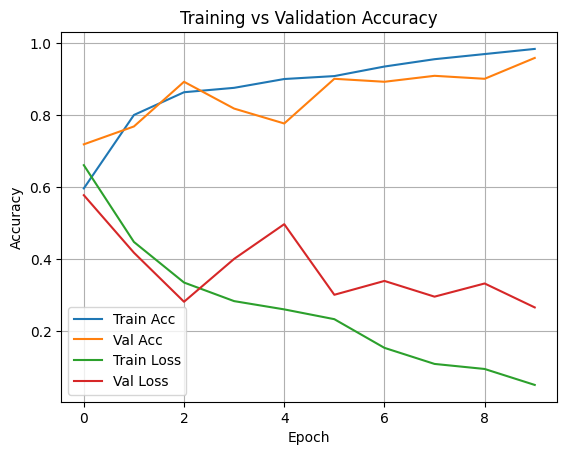

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

ADDING DATA AUGMENTATION & DROPOUT

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train set avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test set juste normalisé
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    directory=f"{dataset_path}/train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{dataset_path}/test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # dropout here
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,699,009 (6.48 MB)

 Trainable params: 1,699,009 (6.48 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
with mlflow.start_run(run_name="CNN_Model_with_dropout"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[tensorboard_callback]
    )

    model.save("cataract_classifier_with_dropout.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

2025/04/23 11:20:02 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 11:20:02 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
c:\Users\hiron\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 908ms/step - accuracy: 0.5375 - loss: 0.7097 - val_accuracy: 0.6529 - val_loss: 0.5990
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 849ms/step - accuracy: 0.6895 - loss: 0.6101 - val_accuracy: 0.7769 - val_loss: 0.4594
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 835ms/step - accuracy: 0.8111 - loss: 0.4645 - val_accuracy: 0.7769 - val_loss: 0.5092
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 784ms/step - accuracy: 0.7694 - loss: 0.4724 - val_accuracy: 0.8512 - val_loss: 0.3773
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 798ms/step - accuracy: 0.8173 - loss: 0.4159 - val_accuracy: 0.8595 - val_loss: 0.3524
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 843ms/step - accuracy: 0.8203 - loss: 0.4098 - val_accuracy: 0.8595 - val_loss: 0.3365
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 787ms/step - accuracy: 0.7943 - loss: 0.3966 - val_accuracy: 0.8843 - val_loss: 0.3279
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 788ms/step - accuracy: 0.8561 - loss: 0.3531 - val_accu

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.7914 - loss: 0.4413
Test Accuracy: 0.84


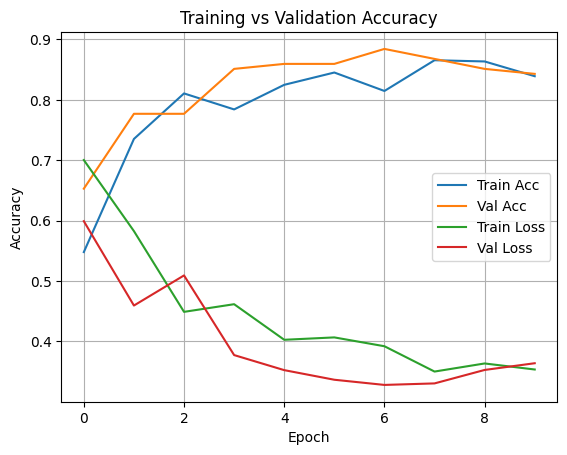

In [9]:

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()

MORE EPOCH + EARLY STOPPING

2025/04/23 11:23:17 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2025/04/23 11:23:17 WARNING mlflow.keras.autologging: Unrecognized dataset type <class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 693ms/step - accuracy: 0.8422 - loss: 0.3778

16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 939ms/step - accuracy: 0.8438 - loss: 0.3748 - val_accuracy: 0.8595 - val_loss: 0.3394
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8348 - loss: 0.3447

16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 783ms/step - accuracy: 0.8362 - loss: 0.3436 - val_accuracy: 0.9008 - val_loss: 0.2641
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.8653 - loss: 0.3201

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 855ms/step - accuracy: 0.8659 - loss: 0.3193 - val_accuracy: 0.9008 - val_loss: 0.2400
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 809ms/step - accuracy: 0.8483 - loss: 0.2780 - val_accuracy: 0.9091 - val_loss: 0.2678
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 850ms/step - accuracy: 0.8749 - loss: 0.3093 - val_accuracy: 0.8595 - val_loss: 0.2898
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 836ms/step - accuracy: 0.8728 - loss: 0.3226 - val_accuracy: 0.8926 - val_loss: 0.2406
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 672ms/step - accuracy: 0.8907 - loss: 0.2823

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 823ms/step - accuracy: 0.8904 - loss: 0.2820 - val_accuracy: 0.9091 - val_loss: 0.2244
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 664ms/step - accuracy: 0.8840 - loss: 0.2840

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 815ms/step - accuracy: 0.8837 - loss: 0.2842 - val_accuracy: 0.9008 - val_loss: 0.2021
Epoch 9/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.8856 - loss: 0.2557 - val_accuracy: 0.9256 - val_loss: 0.2248
Epoch 10/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 804ms/step - accuracy: 0.9018 - loss: 0.2587 - val_accuracy: 0.8678 - val_loss: 0.3336
Epoch 11/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 826ms/step - accuracy: 0.8584 - loss: 0.3156 - val_accuracy: 0.9008 - val_loss: 0.2704
Epoch 12/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 833ms/step - accuracy: 0.8925 - loss: 0.2318 - val_accuracy: 0.9339 - val_loss: 0.2173
Epoch 13/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 872ms/step - accuracy: 0.9251 - loss: 0.1980 - val_accuracy: 0.8843 - val_loss: 0.2310


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 428ms/step - accuracy: 0.8864 - loss: 0.2094
Test Accuracy: 0.90


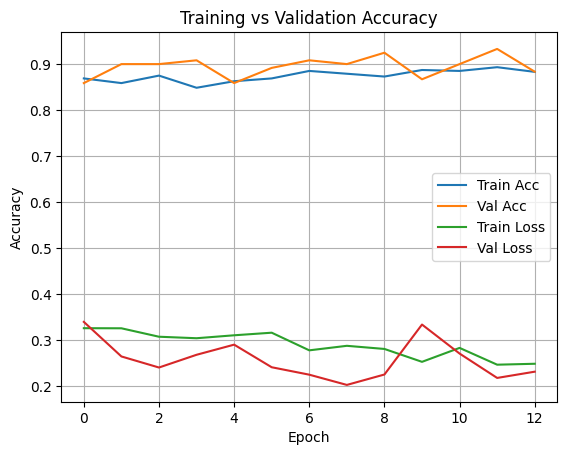

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    tensorboard_callback
]

with mlflow.start_run(run_name="CNN_Model_With_dropout_and_early_stop"):
    mlflow.keras.autolog()

    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=test_generator,
        callbacks=callbacks
    )

    model.save("cataract_classifier_with_dropout_and_early_stop.h5")

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.show()